# Installing Libraries

In [ ]:
%python --version

: 

In [2]:
%pip show pycaret

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: d:\data-science-elec\predictive-data-science-elec\clustering_assignment\clustering_assignment_venv\Lib\site-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, xxhash, yellowbrick
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install numpy pandas

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [4]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pycaret

RuntimeError: ('Pycaret only supports python 3.9, 3.10, 3.11. Your actual Python version: ', sys.version_info(major=3, minor=12, micro=6, releaselevel='final', serial=0), 'Please DOWNGRADE your Python version.')

In [ ]:
from pycaret.utils import version
version()

'3.3.2'

In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Loading Dataset

In [4]:
data = pd.read_csv('/content/sku_data.csv')

## Preprocessing the Dataset

In [ ]:
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [6]:
data.head()

ID  Unitprice  Expire date  Outbound number  Total outbound  \
0  1.0      0.058        547.0              9.0          2441.0   
1  2.0      0.954        547.0              0.0             0.0   
2  3.0      2.385        547.0             12.0            23.0   
3  4.0      5.100        547.0              0.0             0.0   
4  5.0      0.000        547.0              0.0             0.0   

   Pal grossweight  Pal height  Units per pal  
0           105.60        1.56         1920.0  
1           207.68        1.00          384.0  
2           165.78        1.02          108.0  
3           221.04        1.05           72.0  
4             0.00        0.00            0.0

# Using Clustering

In [7]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(data)

# K means Clustering

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

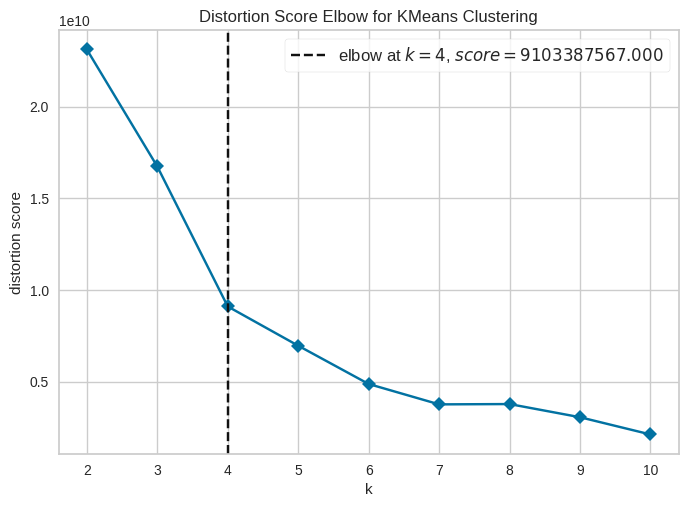

In [8]:
setup(data, verbose=False)
r1 = []
r2 = []
r3 = []

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r1.append(silhouette_score(data,labels))
r1.append(calinski_harabasz_score(data,labels))
r1.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r2.append(silhouette_score(data,labels))
r2.append(calinski_harabasz_score(data,labels))
r2.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r3.append(silhouette_score(data,labels))
r3.append(calinski_harabasz_score(data,labels))
r3.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

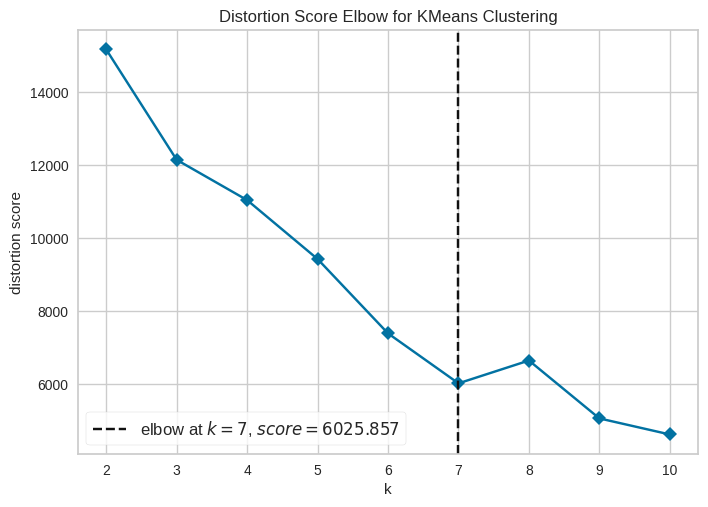

In [9]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
r4 = []
r5 = []
r6 = []
print("Normalized\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r4.append(silhouette_score(data,labels))
r4.append(calinski_harabasz_score(data,labels))
r4.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r5.append(silhouette_score(data,labels))
r5.append(calinski_harabasz_score(data,labels))
r5.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r6.append(silhouette_score(data,labels))
r6.append(calinski_harabasz_score(data,labels))
r6.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Transformation

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

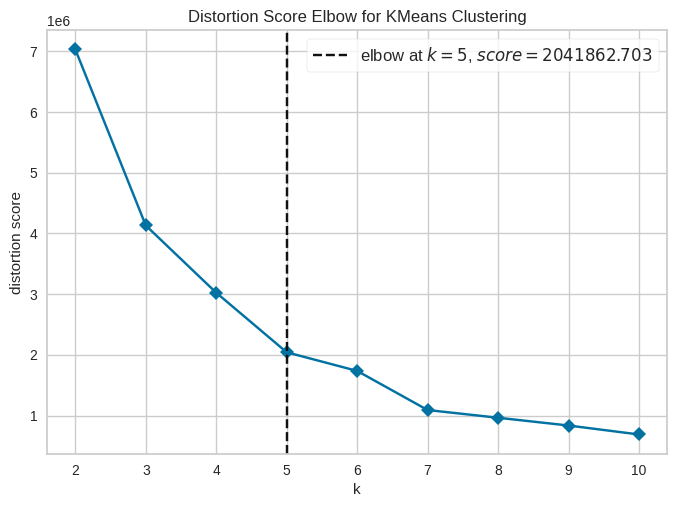

In [10]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
r7 = []
r8 = []
r9 = []

print("Transformation\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r7.append(silhouette_score(data,labels))
r7.append(calinski_harabasz_score(data,labels))
r7.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r8.append(silhouette_score(data,labels))
r8.append(calinski_harabasz_score(data,labels))
r8.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r9.append(silhouette_score(data,labels))
r9.append(calinski_harabasz_score(data,labels))
r9.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')


PCA

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

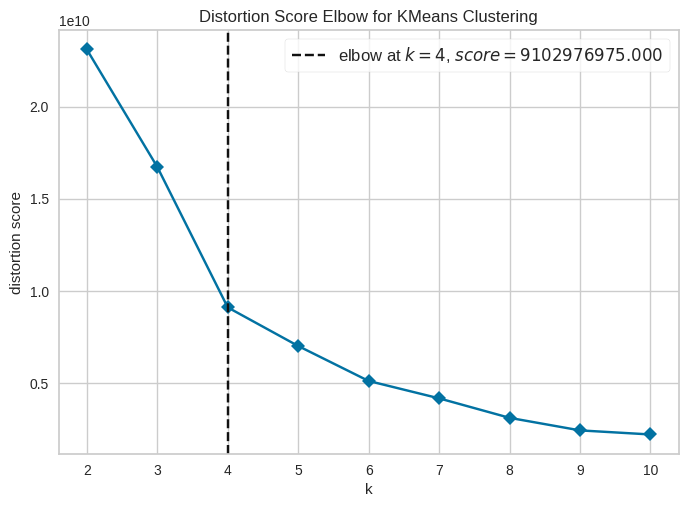

In [11]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
r10 = []
r11 = []
r12 = []

print("PCA\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r10.append(silhouette_score(data,labels))
r10.append(calinski_harabasz_score(data,labels))
r10.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r11.append(silhouette_score(data,labels))
r11.append(calinski_harabasz_score(data,labels))
r11.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r12.append(silhouette_score(data,labels))
r12.append(calinski_harabasz_score(data,labels))
r12.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized and transformation

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

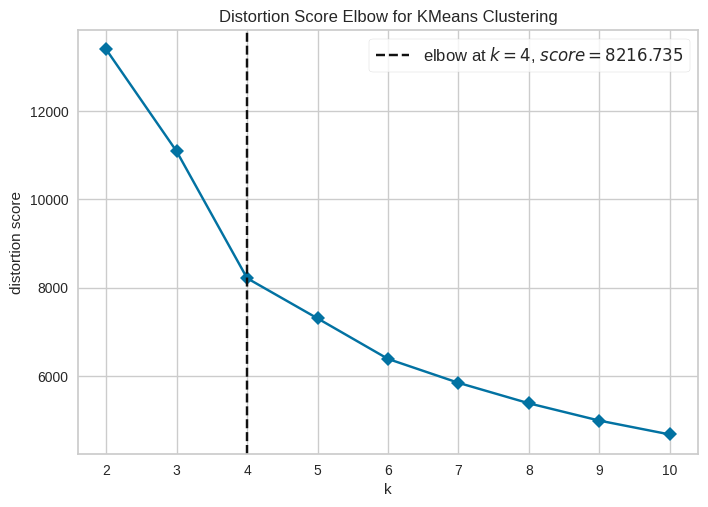

In [12]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson', verbose=False)
r13 = []
r14 = []
r15 = []
print("Normalized and transformation\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r13.append(silhouette_score(data,labels))
r13.append(calinski_harabasz_score(data,labels))
r13.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r14.append(silhouette_score(data,labels))
r14.append(calinski_harabasz_score(data,labels))
r14.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r15.append(silhouette_score(data,labels))
r15.append(calinski_harabasz_score(data,labels))
r15.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized, transformation and PCA

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

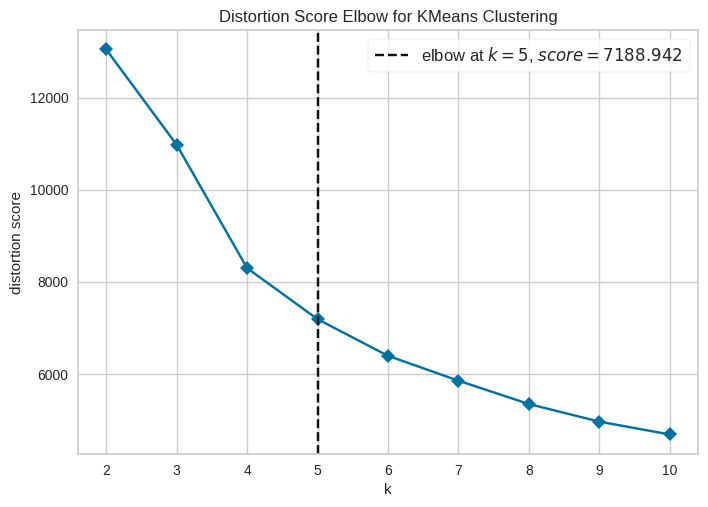

In [13]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson',
      pca = True, pca_method = 'linear', verbose=False)

r16 = []
r17 = []
r18 = []
print("Normalized, transformation and PCA\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r16.append(silhouette_score(data,labels))
r16.append(calinski_harabasz_score(data,labels))
r16.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r17.append(silhouette_score(data,labels))
r17.append(calinski_harabasz_score(data,labels))
r17.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r18.append(silhouette_score(data,labels))
r18.append(calinski_harabasz_score(data,labels))
r18.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

In [15]:
result1 = {'Parameters': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins'],
           'No Data Processing(c=3)': r1,'No Data Processing(c=4)': r2,'No Data Processing(c=5)': r3,
           'Using Normalization(c=3)' : r4,'Using Normalization(c=4)' : r5,'Using Normalization(c=5)' : r6,
           'Using Transform(c=3)' : r7,'Using Transform(c=4)' : r8,'Using Transform(c=5)' : r9,
           'Using PCA(c=3)' : r10,'Using PCA(c=4)' : r11,'Using PCA(c=5)' : r12,
           'Using T + N(c=3)': r13,'Using T + N(c=4)': r14,'Using T + N(c=5)': r15,
           'T + N + PCA(c=3)': r16,'T + N + PCA(c=4)': r17,'T + N + PCA(c=5)': r18}

In [16]:
result1df = pd.DataFrame(result1)

# Hierarichal Clustering

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

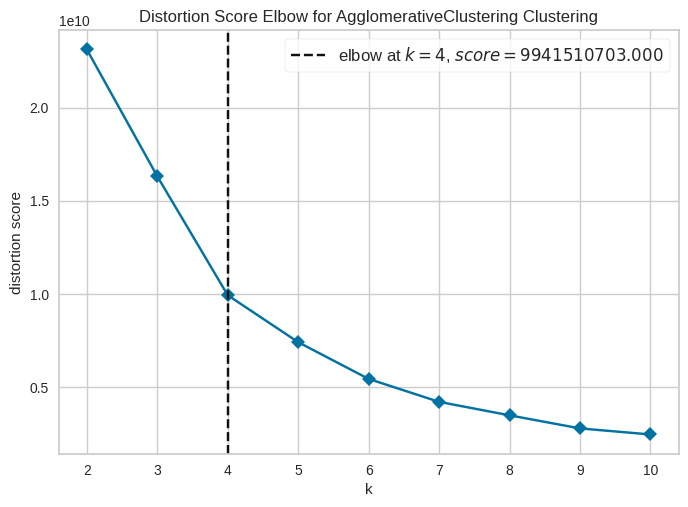

In [17]:
setup(data, verbose=False)
r1 = []
r2 = []
r3 = []
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r1.append(silhouette_score(data,labels))
r1.append(calinski_harabasz_score(data,labels))
r1.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r2.append(silhouette_score(data,labels))
r2.append(calinski_harabasz_score(data,labels))
r2.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
r3.append(silhouette_score(data,labels))
r3.append(calinski_harabasz_score(data,labels))
r3.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

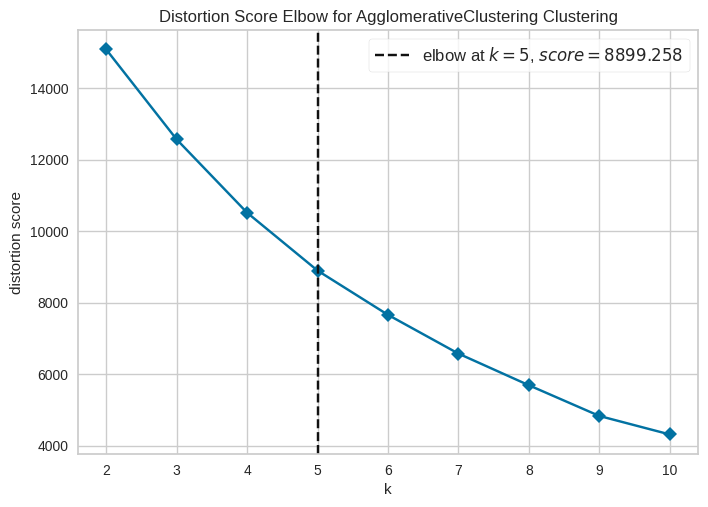

In [18]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
r4 = []
r5 = []
r6 = []
print("Normalized\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r4.append(silhouette_score(data,labels))
r4.append(calinski_harabasz_score(data,labels))
r4.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r5.append(silhouette_score(data,labels))
r5.append(calinski_harabasz_score(data,labels))
r5.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r6.append(silhouette_score(data,labels))
r6.append(calinski_harabasz_score(data,labels))
r6.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Transformation

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

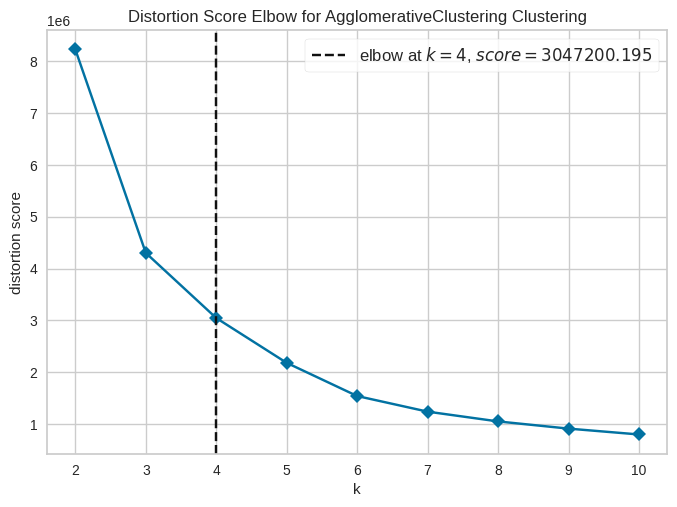

In [19]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
r7 = []
r8 = []
r9 = []

print("Transformation\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r7.append(silhouette_score(data,labels))
r7.append(calinski_harabasz_score(data,labels))
r7.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r8.append(silhouette_score(data,labels))
r8.append(calinski_harabasz_score(data,labels))
r8.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
r9.append(silhouette_score(data,labels))
r9.append(calinski_harabasz_score(data,labels))
r9.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

PCA

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

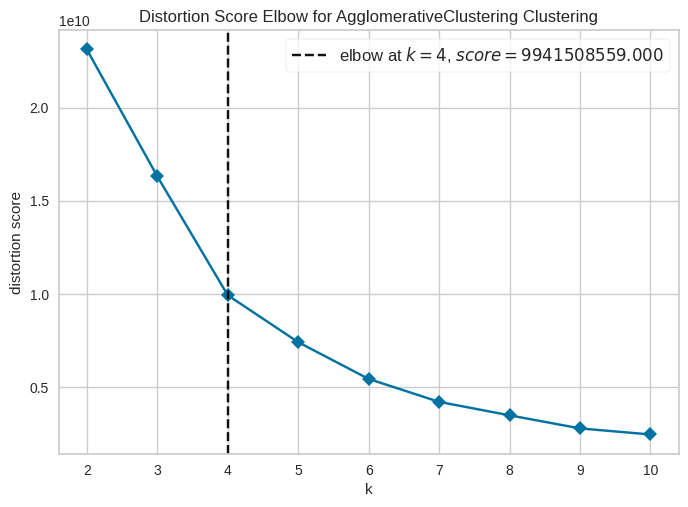

In [20]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
r10 = []
r11 = []
r12 = []

print("PCA\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r10.append(silhouette_score(data,labels))
r10.append(calinski_harabasz_score(data,labels))
r10.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r11.append(silhouette_score(data,labels))
r11.append(calinski_harabasz_score(data,labels))
r11.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
r12.append(silhouette_score(data,labels))
r12.append(calinski_harabasz_score(data,labels))
r12.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized and transformation

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

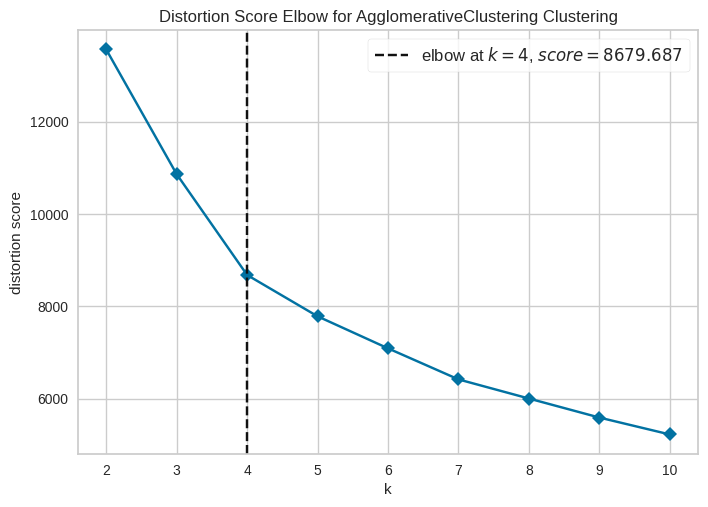

In [21]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson', verbose=False)
r13 = []
r14 = []
r15 = []
print("Normalized and transformation\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r13.append(silhouette_score(data,labels))
r13.append(calinski_harabasz_score(data,labels))
r13.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r14.append(silhouette_score(data,labels))
r14.append(calinski_harabasz_score(data,labels))
r14.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r15.append(silhouette_score(data,labels))
r15.append(calinski_harabasz_score(data,labels))
r15.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized, transformation and PCA

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

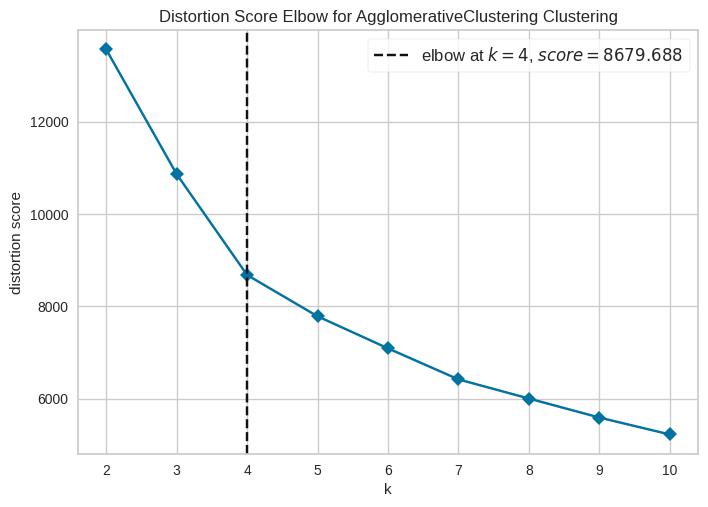

In [22]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson',
      pca = True, pca_method = 'linear', verbose=False)

r16 = []
r17 = []
r18 = []
print("Normalized, transformation and PCA\n")
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)
labels=x.fit_predict(data)
r16.append(silhouette_score(data,labels))
r16.append(calinski_harabasz_score(data,labels))
r16.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)
labels=x.fit_predict(data)
r17.append(silhouette_score(data,labels))
r17.append(calinski_harabasz_score(data,labels))
r17.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)
labels=x.fit_predict(data)
r18.append(silhouette_score(data,labels))
r18.append(calinski_harabasz_score(data,labels))
r18.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

In [23]:
result2 = {'Parameters': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins'],
           'No Data Processing(c=3)': r1,'No Data Processing(c=4)': r2,'No Data Processing(c=5)': r3,
           'Using Normalization(c=3)' : r4,'Using Normalization(c=4)' : r5,'Using Normalization(c=5)' : r6,
           'Using Transform(c=3)' : r7,'Using Transform(c=4)' : r8,'Using Transform(c=5)' : r9,
           'Using PCA(c=3)' : r10,'Using PCA(c=4)' : r11,'Using PCA(c=5)' : r12,
           'Using T + N(c=3)': r13,'Using T + N(c=4)': r14,'Using T + N(c=5)': r15,
           'T + N + PCA(c=3)': r16,'T + N + PCA(c=4)': r17,'T + N + PCA(c=5)': r18}

In [24]:
result2df = pd.DataFrame(result2)

# Birch Clustering

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

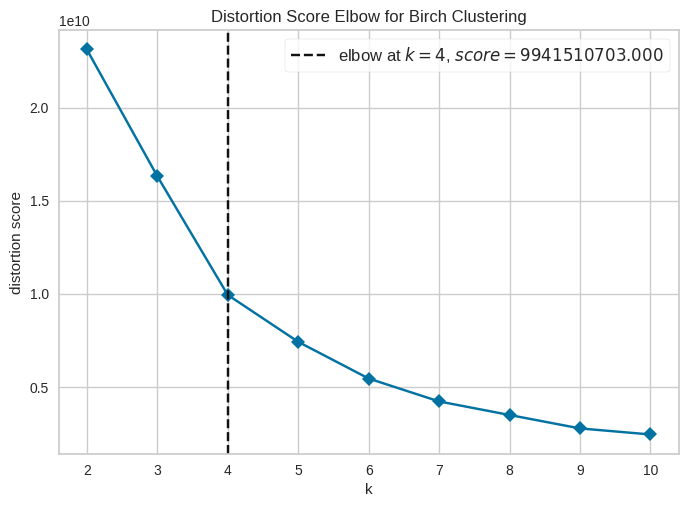

In [25]:
setup(data, verbose=False)
r101 = []
r102 = []
r103 = []
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r101.append(silhouette_score(data,labels))
r101.append(calinski_harabasz_score(data,labels))
r101.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r102.append(silhouette_score(data,labels))
r102.append(calinski_harabasz_score(data,labels))
r102.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
labels=x.fit_predict(data)
r103.append(silhouette_score(data,labels))
r103.append(calinski_harabasz_score(data,labels))
r103.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

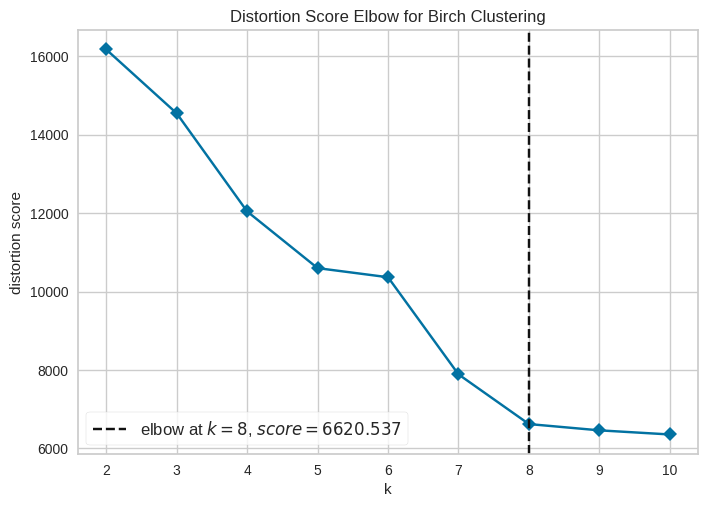

In [26]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
r104 = []
r105 = []
r106 = []
print("Normalized\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r104.append(silhouette_score(data,labels))
r104.append(calinski_harabasz_score(data,labels))
r104.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r105.append(silhouette_score(data,labels))
r105.append(calinski_harabasz_score(data,labels))
r105.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r106.append(silhouette_score(data,labels))
r106.append(calinski_harabasz_score(data,labels))
r106.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Transformation

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

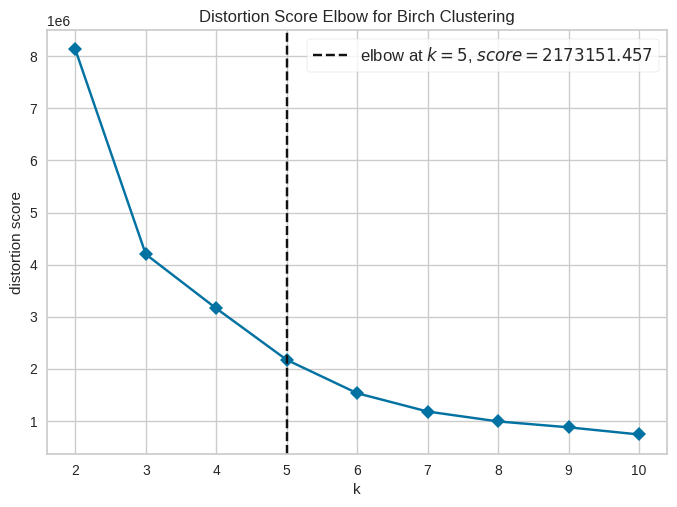

In [27]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
r107 = []
r108 = []
r109 = []

print("Transformation\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r107.append(silhouette_score(data,labels))
r107.append(calinski_harabasz_score(data,labels))
r107.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r108.append(silhouette_score(data,labels))
r108.append(calinski_harabasz_score(data,labels))
r108.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
labels=x.fit_predict(data)
r109.append(silhouette_score(data,labels))
r109.append(calinski_harabasz_score(data,labels))
r109.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

PCA

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

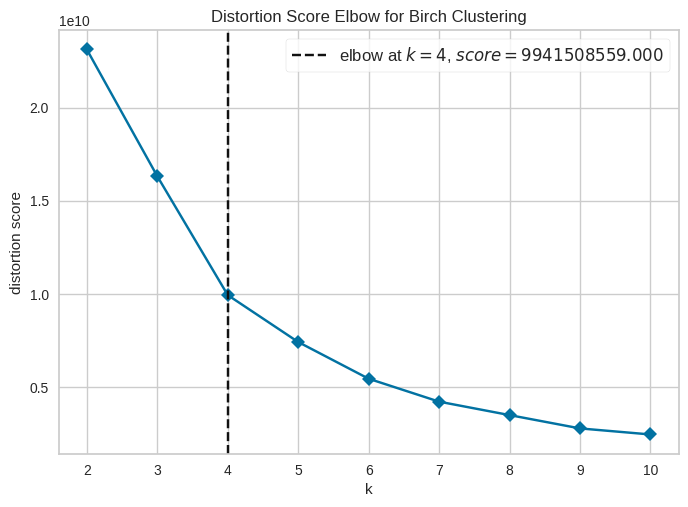

In [28]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
r110 = []
r111 = []
r112 = []

print("PCA\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r110.append(silhouette_score(data,labels))
r110.append(calinski_harabasz_score(data,labels))
r110.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r111.append(silhouette_score(data,labels))
r111.append(calinski_harabasz_score(data,labels))
r111.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
labels=x.fit_predict(data)
r112.append(silhouette_score(data,labels))
r112.append(calinski_harabasz_score(data,labels))
r112.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

In [29]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson', verbose=False)
r113 = []
r114 = []
r115 = []
print("Normalized and transformation\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r113.append(silhouette_score(data,labels))
r113.append(calinski_harabasz_score(data,labels))
r113.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r114.append(silhouette_score(data,labels))
r114.append(calinski_harabasz_score(data,labels))
r114.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r115.append(silhouette_score(data,labels))
r115.append(calinski_harabasz_score(data,labels))
r115.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized and transformation

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [30]:
setup(data = data, normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson',
      pca = True, pca_method = 'linear', verbose=False)

r116 = []
r117 = []
r118 = []
print("Normalized, transformation and PCA\n")
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)
labels=x.fit_predict(data)
r116.append(silhouette_score(data,labels))
r116.append(calinski_harabasz_score(data,labels))
r116.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)
labels=x.fit_predict(data)
r117.append(silhouette_score(data,labels))
r117.append(calinski_harabasz_score(data,labels))
r117.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)
labels=x.fit_predict(data)
r118.append(silhouette_score(data,labels))
r118.append(calinski_harabasz_score(data,labels))
r118.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized, transformation and PCA

For Cluster = 3


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [31]:
result3 = {'Parameters': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldins'],
           'No Data Processing(c=3)': r101,'No Data Processing(c=4)': r102,'No Data Processing(c=5)': r103,
           'Using Normalization(c=3)' : r104,'Using Normalization(c=4)' : r105,'Using Normalization(c=5)' : r106,
           'Using Transform(c=3)' : r107,'Using Transform(c=4)' : r108,'Using Transform(c=5)' : r109,
           'Using PCA(c=3)' : r110,'Using PCA(c=4)' : r111,'Using PCA(c=5)' : r112,
           'Using T + N(c=3)': r113,'Using T + N(c=4)': r114,'Using T + N(c=5)': r115,
           'T + N + PCA(c=3)': r116,'T + N + PCA(c=4)': r117,'T + N + PCA(c=5)': r118}

In [32]:
result3df = pd.DataFrame(result3)

# Results

In [33]:
print("Using K-Means Clustering")
result1df


Using K-Means Clustering


Parameters  No Data Processing(c=3)  No Data Processing(c=4)  \
0         Silhouette                 0.707370                 0.716098   
1  Calinski-Harabasz              6016.496710              7066.791655   
2    Davies-Bouldins                 0.517765                 0.460634   

   No Data Processing(c=5)  Using Normalization(c=3)  \
0                 0.670499                  0.805357   
1              7287.208192               6401.932847   
2                 0.428615                  0.359334   

   Using Normalization(c=4)  Using Normalization(c=5)  Using Transform(c=3)  \
0                  0.811471                  0.609162              0.806548   
1               7787.228500               7754.999515           6402.103638   
2                  0.344868                  0.486967              0.356748   

   Using Transform(c=4)  Using Transform(c=5)  Using PCA(c=3)  Using PCA(c=4)  \
0              0.816864              0.701820        0.946890        0.812627   
1           6951.420368           7739.037669     5837.678933     7787.612660   
2              0.522604              0.486066        0.174957        0.342925   

   Using PCA(c=5)  Using T + N(c=3)  Using T + N(c=4)  Using T + N(c=5)  \
0        0.609162          0.876769          0.816864          0.800294   
1     7754.999515       5450.079113       6951.420368       7786.540924   
2        0.486967          0.463208          0.522604          0.377521   

   T + N + PCA(c=3)  T + N + PCA(c=4)  T + N + PCA(c=5)  
0          0.805357          0.811471          0.800108  
1       6401.932847       7787.228500       7785.988991  
2          0.359334          0.344868          0.379436

In [34]:
print("Using Hierarchical Clustering")
result2df


Using Hierarchical Clustering


Parameters  No Data Processing(c=3)  No Data Processing(c=4)  \
0         Silhouette                 0.707370                 0.716098   
1  Calinski-Harabasz              6016.496710              7066.791655   
2    Davies-Bouldins                 0.517765                 0.460634   

   No Data Processing(c=5)  Using Normalization(c=3)  \
0                 0.670499                  0.707370   
1              7287.208192               6016.496710   
2                 0.428615                  0.517765   

   Using Normalization(c=4)  Using Normalization(c=5)  Using Transform(c=3)  \
0                  0.716098                  0.670499              0.707370   
1               7066.791655               7287.208192           6016.496710   
2                  0.460634                  0.428615              0.517765   

   Using Transform(c=4)  Using Transform(c=5)  Using PCA(c=3)  Using PCA(c=4)  \
0              0.716098              0.670499        0.707370        0.716098   
1           7066.791655           7287.208192     6016.496710     7066.791655   
2              0.460634              0.428615        0.517765        0.460634   

   Using PCA(c=5)  Using T + N(c=3)  Using T + N(c=4)  Using T + N(c=5)  \
0        0.670499          0.707370          0.716098          0.670499   
1     7287.208192       6016.496710       7066.791655       7287.208192   
2        0.428615          0.517765          0.460634          0.428615   

   T + N + PCA(c=3)  T + N + PCA(c=4)  T + N + PCA(c=5)  
0          0.707370          0.716098          0.670499  
1       6016.496710       7066.791655       7287.208192  
2          0.517765          0.460634          0.428615

In [35]:
print("Using Birch Clustering")
result3df

Using Birch Clustering


Parameters  No Data Processing(c=3)  No Data Processing(c=4)  \
0         Silhouette                 0.707370                 0.716098   
1  Calinski-Harabasz              6016.496710              7066.791655   
2    Davies-Bouldins                 0.517765                 0.460634   

   No Data Processing(c=5)  Using Normalization(c=3)  \
0                 0.670499                  0.707370   
1              7287.208192               6016.496710   
2                 0.428615                  0.517765   

   Using Normalization(c=4)  Using Normalization(c=5)  Using Transform(c=3)  \
0                  0.716098                  0.670499              0.707370   
1               7066.791655               7287.208192           6016.496710   
2                  0.460634                  0.428615              0.517765   

   Using Transform(c=4)  Using Transform(c=5)  Using PCA(c=3)  Using PCA(c=4)  \
0              0.716098              0.670499        0.707370        0.716098   
1           7066.791655           7287.208192     6016.496710     7066.791655   
2              0.460634              0.428615        0.517765        0.460634   

   Using PCA(c=5)  Using T + N(c=3)  Using T + N(c=4)  Using T + N(c=5)  \
0        0.670499          0.707370          0.716098          0.670499   
1     7287.208192       6016.496710       7066.791655       7287.208192   
2        0.428615          0.517765          0.460634          0.428615   

   T + N + PCA(c=3)  T + N + PCA(c=4)  T + N + PCA(c=5)  
0          0.707370          0.716098          0.670499  
1       6016.496710       7066.791655       7287.208192  
2          0.517765          0.460634          0.428615